# Python DA Assignment 2 -

# Data Visualization

In [1]:
!pip install seaborn

In [2]:
!pip install matplotlib
import matplotlib.pyplot as plt

In [3]:
#Insatlling numpy
!pip install numpy

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#1) Loading the Taxis Dataset

In [5]:
# Load the 'taxis' dataset

df = sns.load_dataset("taxis")

In [6]:
print(df)

                  pickup             dropoff  passengers  distance  fare  \
0    2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0   
1    2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0   
2    2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5   
3    2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0   
4    2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0   
...                  ...                 ...         ...       ...   ...   
6428 2019-03-31 09:51:53 2019-03-31 09:55:27           1      0.75   4.5   
6429 2019-03-31 17:38:00 2019-03-31 18:34:23           1     18.74  58.0   
6430 2019-03-23 22:55:18 2019-03-23 23:14:25           1      4.14  16.0   
6431 2019-03-04 10:09:25 2019-03-04 10:14:29           1      1.12   6.0   
6432 2019-03-13 19:31:22 2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   color      payment            pickup_zone  \
0     2.15    0

# 2) Handling Missing Values

In [7]:
# Check for missing values in the dataset and identify columns with missing data.
missing_values = df.isnull().sum()
print(missing_values)

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [9]:
# Impute missing values using appropriate strategies based on the column type (e.g., using mean, median, or mode for numerical columns, and mode for categorical columns).


# Check missing values
df.isnull().sum()

# Separate numerical and categorical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns
for col in num_cols:
    df[col].fillna(df[col].mean(), inplace=True)
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Numerical → median
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Categorical → mode
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(x.mode()[0]))
df.isnull().sum()


/tmp/ipython-input-1214216353.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
/tmp/ipython-input-1214216353.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

,0
pickup,0
dropoff,0
passengers,0
distance,0
fare,0
tip,0
tolls,0
total,0
color,0
payment,0


In [ ]:
# For columns that are critical and cannot be reasonably imputed, remove rows with missing values to maintain data integrity.

df_cleaned = df.dropna()
df_cleaned

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


# 3) Visualizations using Matplotlib/Pandas Plot:

# Line Chart

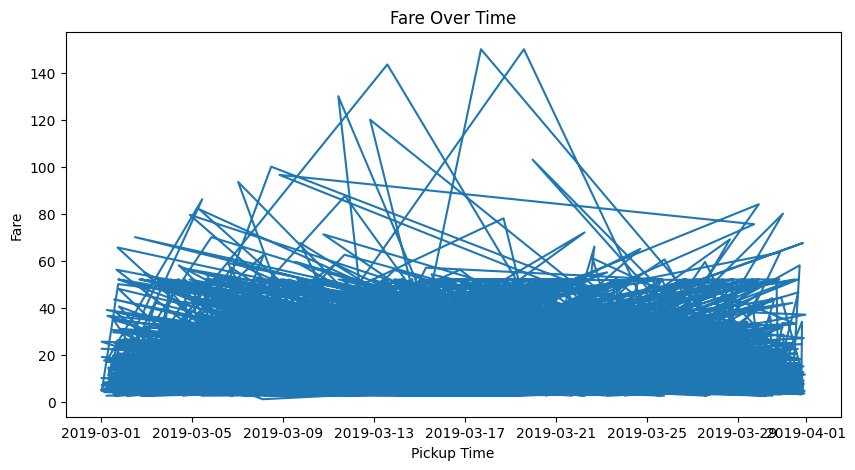

In [10]:
# Plot a line chart to visualize the fare over time, using the pickup timestamp as the x-axis and fare as the y-axis. Ensure the pickup column is converted to a datetime format before plotting.

df['pickup'] = pd.to_datetime(df['pickup'])

plt.figure(figsize=(10,5))
plt.plot(df['pickup'], df['fare'])
plt.xlabel("Pickup Time")
plt.ylabel("Fare")
plt.title("Fare Over Time")
plt.show()



## Bar Chart

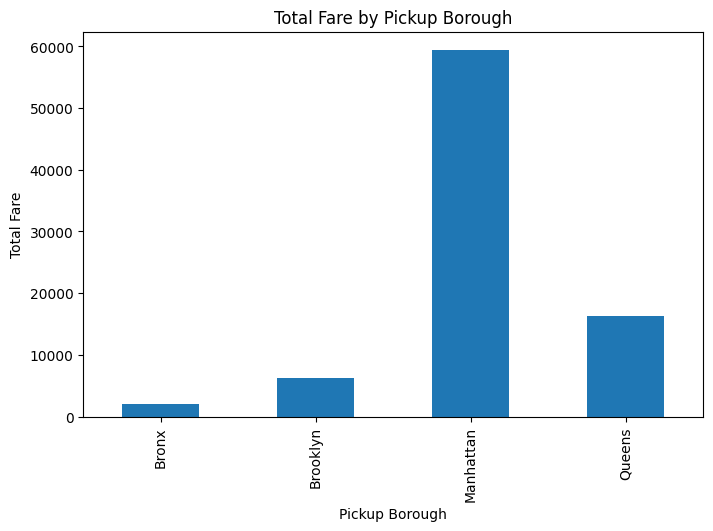

In [11]:
# Create a bar chart to show the total fare for each pickup_borough. Group the data by pickup_borough and sum the fare for each group.
bourough_fare = df.groupby('pickup_borough')['fare'].sum()

bourough_fare.plot(kind='bar', figsize=(8,5))
plt.xlabel("Pickup Borough")
plt.ylabel("Total Fare")
plt.title("Total Fare by Pickup Borough")
plt.show()





## Pie Chart

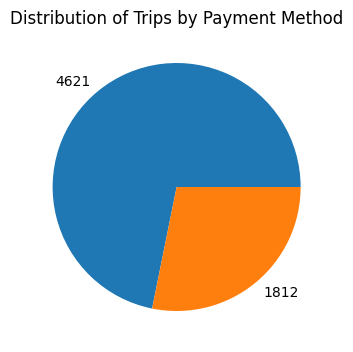

In [12]:
# Plot a pie chart showing the distribution of trips based on the payment method (credit card, cash, etc.). Each slice should represent the count of trips for a specific payment method.

payment_method_counts = df['payment'].value_counts()
plt.figure(figsize=(4,5))
plt.pie(payment_method_counts, labels=payment_method_counts)
plt.title('Distribution of Trips by Payment Method')
plt.show()

# Histogram

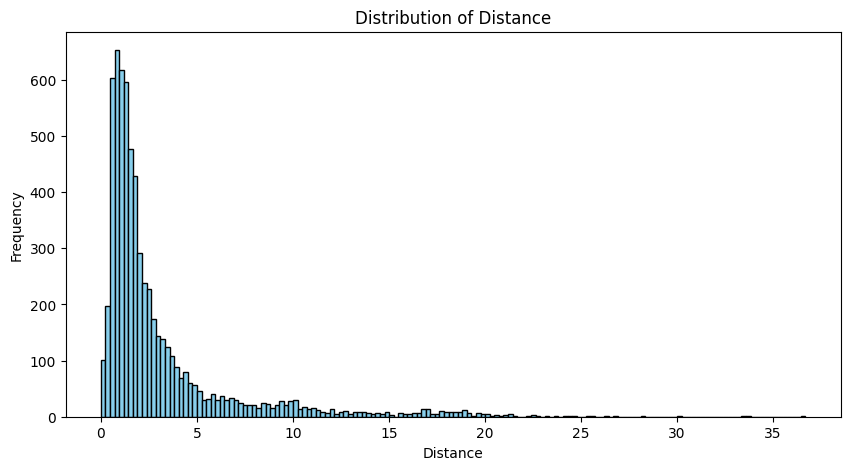

In [13]:
# Create a histogram to visualize the distribution of distance. Customize the number of bins for better granularity and ensure the plot is easy to interpret.

plt.figure(figsize=(10,5))
plt.hist(df['distance'], bins='auto', color='skyblue', edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distance')
plt.show()


# Box Plot

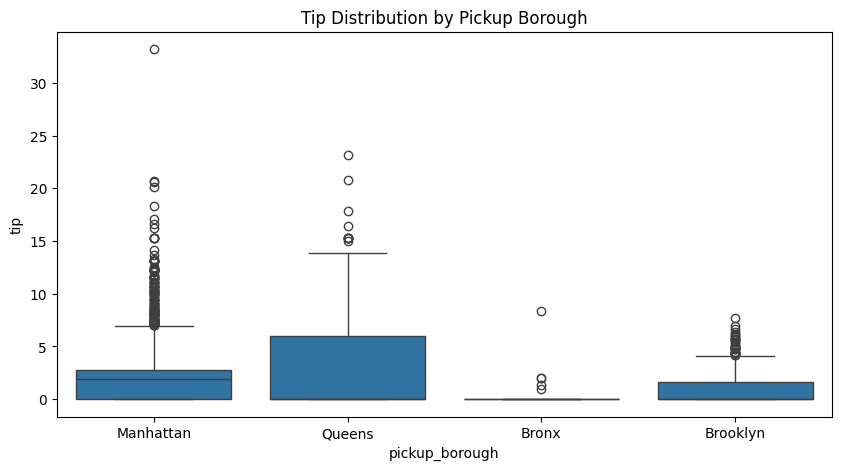

In [14]:
# Plot a box plot to visualize the distribution of tip amounts for each pickup_borough. Use pickup_borough as the categorical axis and tip as the numeric axis.
plt.figure(figsize=(10,5))
sns.boxplot(x='pickup_borough', y='tip', data=df)
plt.title("Tip Distribution by Pickup Borough")
plt.show()



# Visualizations using Seaborn:

## Count Plot

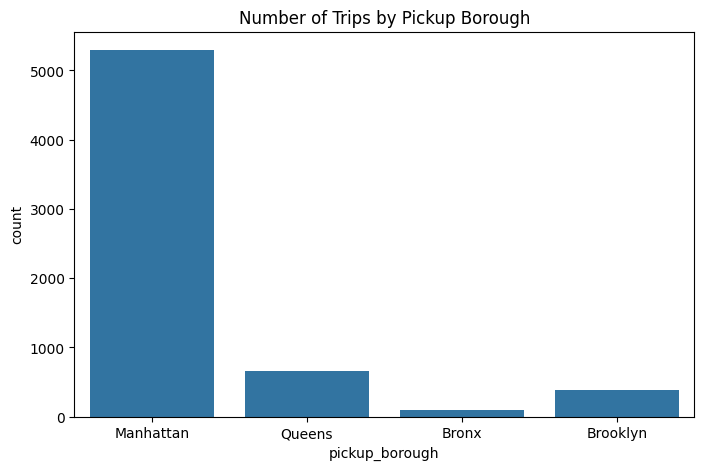

In [15]:
# Create a count plot to visualize the number of trips in each pickup_borough. The x-axis should represent the boroughs, and the y-axis should show the count of trips.

plt.figure(figsize=(8,5))
sns.countplot(x='pickup_borough', data=df)
plt.title("Number of Trips by Pickup Borough")
plt.show()

## Scatter Plot

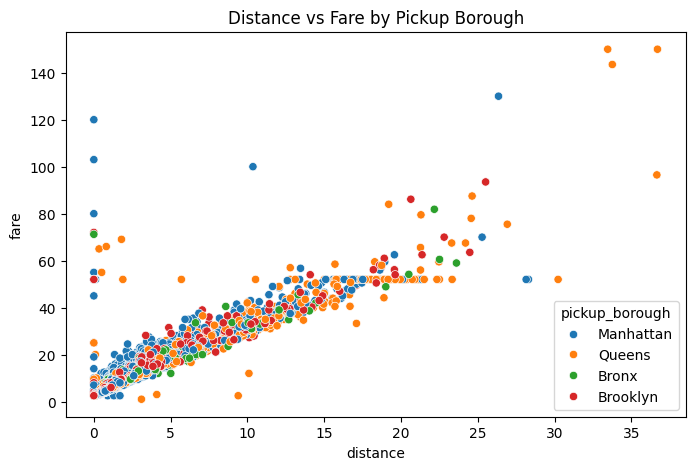

In [16]:
# Plot a scatter plot to show the relationship between distance and fare. Use distance on the x-axis and fare on the y-axis to visualize any correlation. Color the points based on the pickup_borough to differentiate the trips by their respective boroughs.

plt.figure(figsize=(8,5))
sns.scatterplot(x='distance', y='fare', hue='pickup_borough', data=df)
plt.title("Distance vs Fare by Pickup Borough")
plt.show()


## Heatmap

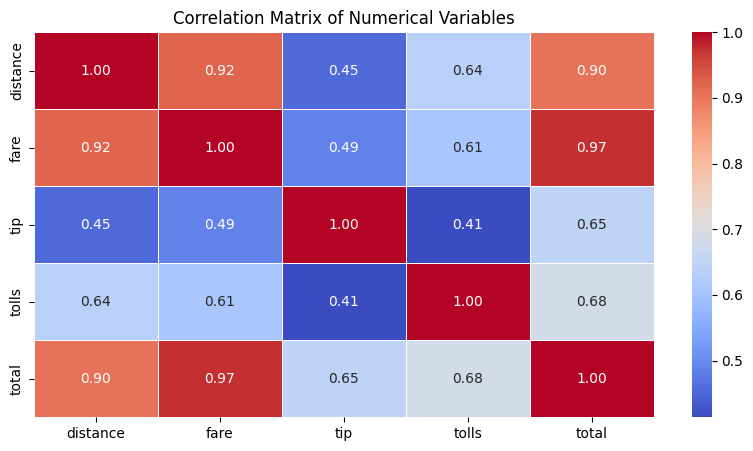

In [17]:
# Plot a heatmap to visualize the correlation between numerical variables such as distance, fare, tip, tolls, and total. Use a correlation matrix to highlight the relationships.
# Select the numerical columns for correlation analysis
numerical_cols = ['distance', 'fare', 'tip', 'tolls', 'total']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()



## Pair Plot

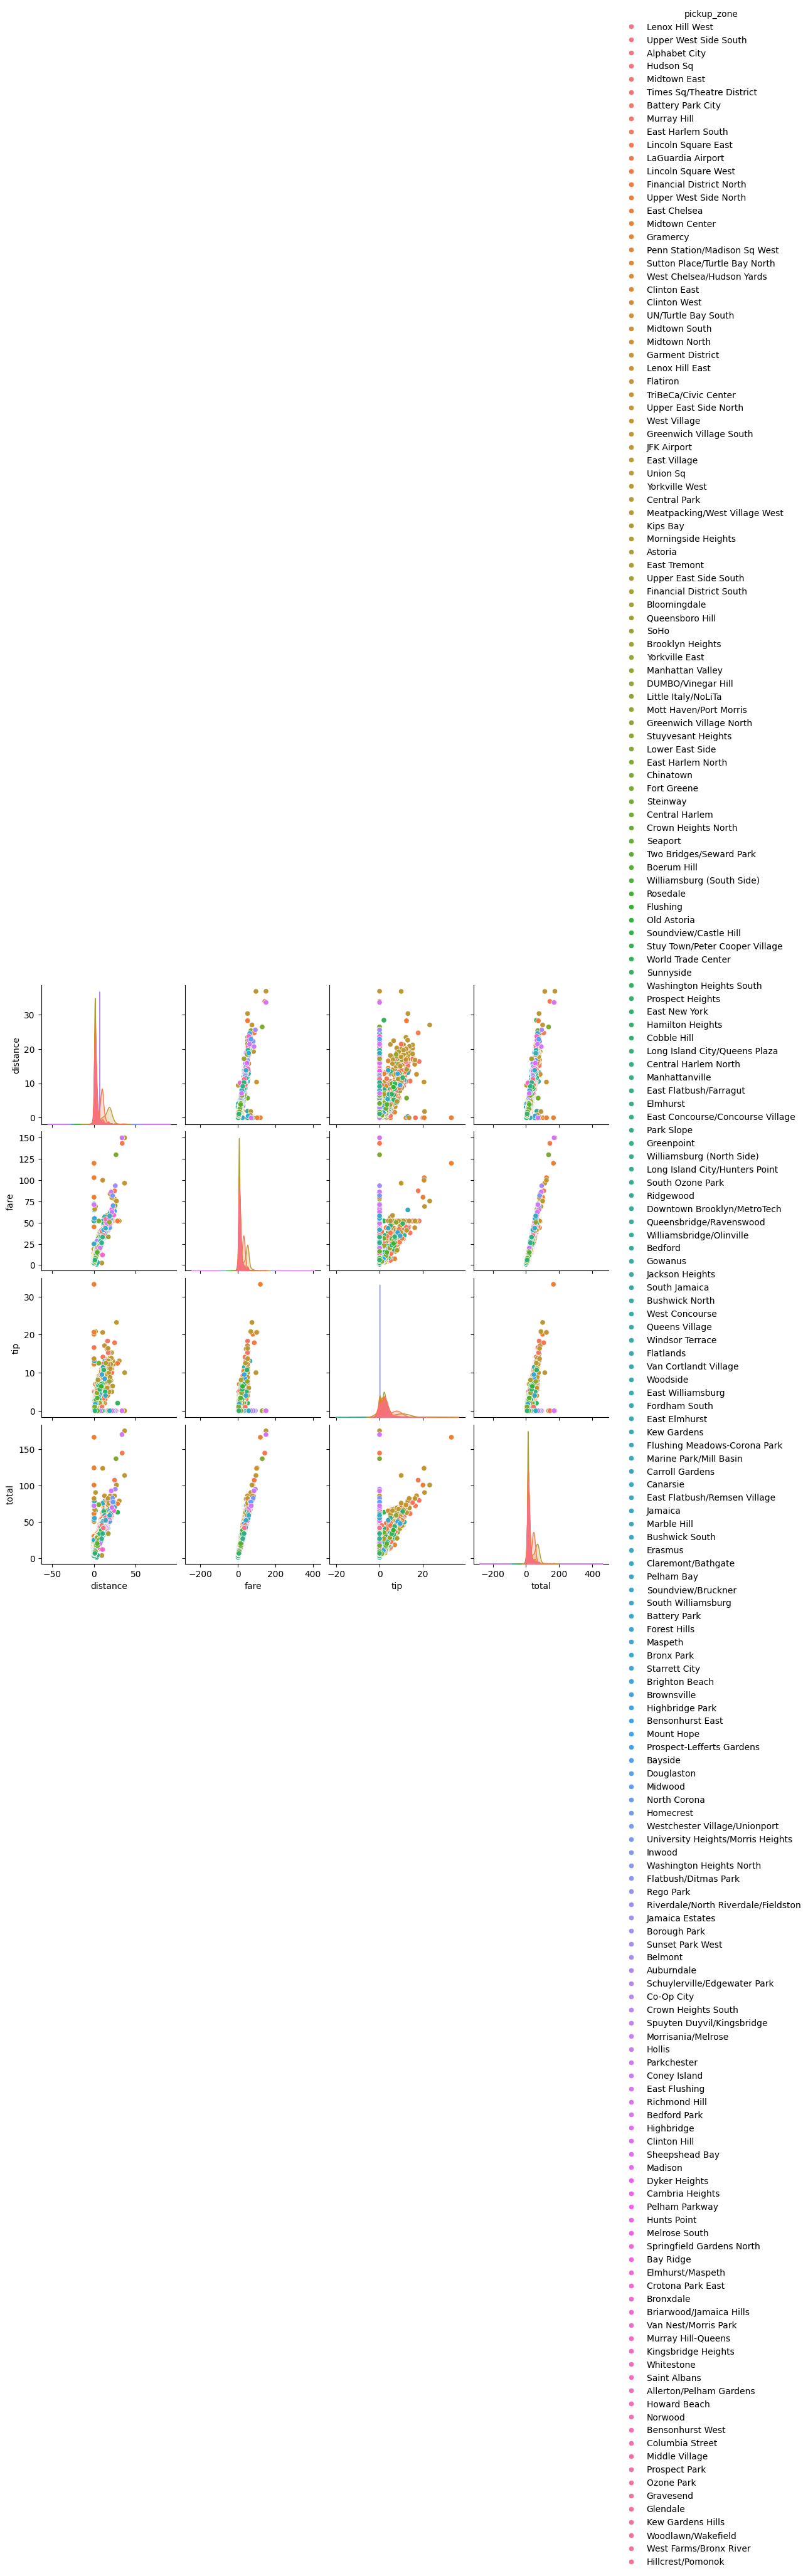

In [18]:
# Create a pair plot to visualize the pairwise relationships between distance, fare, tip, and total. Color the data points according to the pickup_zone method to compare how different zones affect these variables.

sns.pairplot(
    df,
    vars=['distance', 'fare', 'tip', 'total'],
    hue='pickup_zone'
)
plt.show()



## Violin Plot

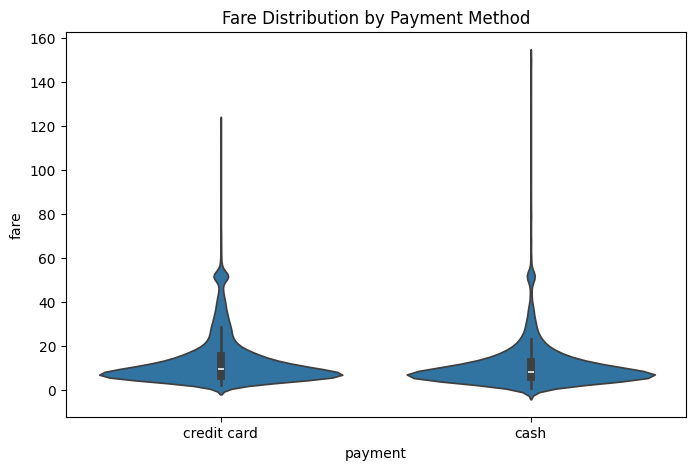

In [19]:
# Plot a violin plot to show the distribution of fare for each payment method. Use the payment method as the categorical axis and fare as the numeric axis to visualize its distribution.

plt.figure(figsize=(8,5))
sns.violinplot(x='payment', y='fare', data=df)
plt.title("Fare Distribution by Payment Method")
plt.show()